# Classification with Multiple Linear Regression (MLR), banknote authentication

## Index
<nav>

* [Import modules](#import_modules)
* [Loading data](#loading_data)
* [Data preprocessing](#data_preprocessing)
* [Cross validation](#cross_validation)
* [Training (fit the model)](#training)
* [Test (evaluate the model)](#test)
* [References](#references)
</nav>

<a id="import_modules"></a>
## Import modules

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import MinMaxScaler

<a id="loading_data"></a>
## Loading data

In [4]:
# Load training data
filename1 = 'input\\data_banknote_authentication.txt'
banknote_df = pd.read_csv(filename1, delimiter=',', header=None)
banknote_df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<a id="data_preprocessing"></a>
## Data preprocessing

In [ ]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(banknote_df)
banknote_df = pd.DataFrame(x_scaled)

In [6]:
train_df, test_df = train_test_split(banknote_df, test_size=0.2)
print(train_df)
print(test_df)

            0        1        2        3  4
1321 -1.99660 -9.50010  9.68200 -0.12889  1
174   1.87990  2.47070  2.49310  0.37671  0
63    1.79390 -1.11740  1.54540 -0.26079  0
419   1.95720 -5.11530  8.61270 -1.42970  0
1123  0.26637  0.73252 -0.67891  0.03533  1
...       ...      ...      ...      ... ..
83    1.86640  7.77630 -0.23849 -2.96340  0
469   0.18480  6.50790  2.01330 -0.87242  0
1263 -0.87834  3.25700 -3.67780 -3.29440  1
634   6.82480  5.21870 -2.54250  0.54610  0
1030 -1.84390 -8.64750  7.67960 -0.66682  1

[1097 rows x 5 columns]
            0        1        2         3  4
285   1.77470  -6.4334  8.15000 -0.898280  0
288   0.44125   2.9487  4.32250  0.715500  0
113   4.21880   6.8162 -1.28040  0.760760  0
874  -2.79900   1.9679 -0.42357 -2.112500  1
996  -2.31420   2.0838 -0.46813 -1.676700  1
...       ...      ...      ...       ... ..
1275 -3.09860 -10.4602  8.97170 -2.342700  1
184  -1.75590  11.9459  3.09460 -4.897800  0
170   0.57060  -0.0248  1.24210 -0.562100 

<a id="cross_validation"></a>
## Cross validation

Using [k-fold cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold) in order to find good values for all the parameters of SVM: kernel, and parameters.

In [18]:
X_train = train_df.iloc[:,0:4].to_numpy()
y_train = train_df.iloc[:,4].astype(int).to_numpy()

clf = LinearRegression()
# 4-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=4)
print(1 - scores)
print(1 - np.mean(scores))

[0.13853471 0.1454795  0.12270476 0.14246801]
0.13729674558289073


<a id="training"></a>
## Training (fit the model)

In [11]:
# Create model
clf = LinearRegression()

# Training
clf.fit(X_train, y_train)

LinearRegression()

<a id="test"></a>
## Test (evaluate the model)

Model accuracy: 0.9890909090909091


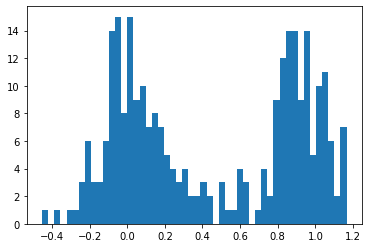

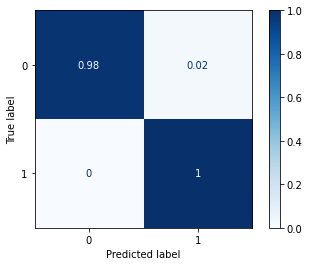

Confusion matrix:
 [[146   3]
 [  0 126]]
Percentage classification error obtained from test set: 1.090909090909091%


In [15]:
X_test = test_df.iloc[:,0:4].to_numpy()
y_test = test_df.iloc[:,4].astype(int).to_numpy()

# Generate predictions
y_pred = clf.predict(X_test)
#print(y_pred)
#print(y_test)
plt.hist(y_pred, bins=50)

# Use a threshold to select the probabilities that will determine class 0 or 1
threshold = 0.5
y_pred = np.where(y_pred > threshold, 1,0)
y_test = np.where(y_test > threshold, 1,0)

# Evaluate by means of accuracy
accuracy = accuracy_score(y_test.astype(int), y_pred.astype(int))
print(f'Model accuracy: {accuracy}')

# Evaluate by means of a confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test.astype(int), y_pred.astype(int),
                                               cmap=plt.cm.Blues,
                                               normalize='true')
plt.show()

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

# Calculate the percentage classification error obtained from test set
percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
print(f'Percentage classification error obtained from test set: {percentage_classification_error}%')

In [17]:
banknote_mlr_results = {'real_value': y_test,
                    'prediction': y_pred}
  
df = pd.DataFrame(banknote_mlr_results)

df.to_csv('banknote_mlr_results.csv')

<a id="references"></a>
## References:

Linear Regression:

- Classification in Python with Scikit-Learn and Pandas: https://stackabuse.com/classification-in-python-with-scikit-learn-and-pandas/